# **MIELAGE PREDICTION-REGRESSION ANALYSIS**



# Objective

To develop an accurate regression model that predicts the mileage (fuel efficiency) of a vehicle based on relevant features such as cylinders, displacement, horsepower, weight, acceleration, model year and other pertinent factors. The goal is to create a reliable model that can assist in estimating fuel consumption, enabling better understanding and optimization of vehicle performance. The model should provide insights into the key factors influencing mileage and serve as a valuable tool for automotive engineers, manufacturers, and consumers to make informed decisions regarding fuel efficiency and environmental impact.

# DATA SOURCE

This data is taken from the StatLib Library which is maintained at Carneige Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

# Import libraries

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

# import data

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/nehasreenivas/Mielage-Prediction-Regression-Analysis/refs/heads/main/MPG.csv')

# Describe Data

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# Data Preprocessing

In [ ]:
df.nunique()

,0
mpg,127
cylinders,5
displacement,81
horsepower,93
weight,346
acceleration,95
model_year,13
origin,3
name,301


In [ ]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

# Remove Missing value


In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# Data Visualization

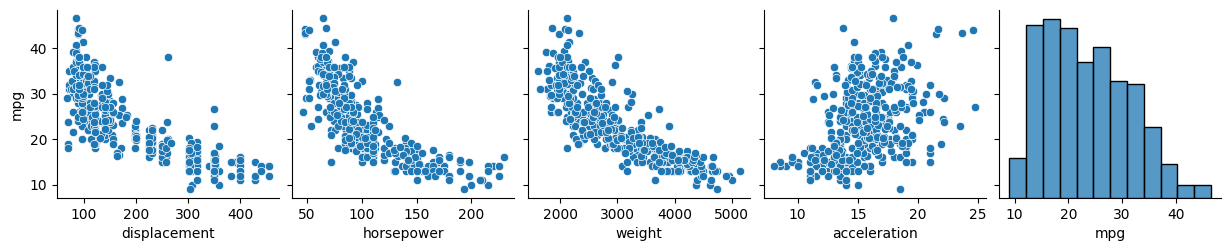

In [ ]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg']);

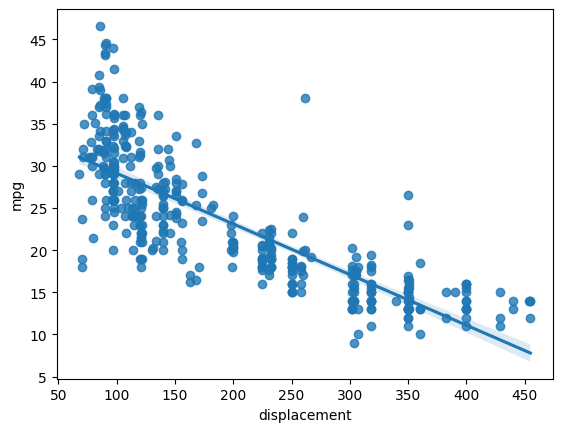

In [ ]:
sns.regplot(x='displacement',y='mpg',data=df);

# Define Target Variable X and Feature y

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y=df['mpg']

In [ ]:
y.shape

(392,)

In [ ]:
X=df[['displacement', 'horsepower', 'weight',
       'acceleration']]

In [ ]:
X.shape

(392, 4)

In [ ]:
X

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


In [ ]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


# Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
X=ss.fit_transform(X)

In [ ]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [ ]:
pd.DataFrame(X)

,0,1,2,3
0,1.077290,0.664133,0.620540,-1.285258
1,1.488732,1.574594,0.843334,-1.466724
2,1.182542,1.184397,0.540382,-1.648189
3,1.048584,1.184397,0.536845,-1.285258
4,1.029447,0.924265,0.555706,-1.829655
...,...,...,...,...
387,-0.520637,-0.480448,-0.221125,0.021294
388,-0.932079,-1.364896,-0.999134,3.287676
389,-0.568479,-0.532474,-0.804632,-1.430430
390,-0.712005,-0.662540,-0.415627,1.110088


In [ ]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


After standardization mean is Zero and standard deviation is 1

# Train Test Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=2529)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

# Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
l=LinearRegression()

In [ ]:
l.fit(X_train,y_train)

LinearRegression()

In [ ]:
l.intercept_

23.485738559737584

In [ ]:
l.coef_

array([-1.05767743, -1.68734727, -4.10787617, -0.11495177])

mileage=23.5  -1.057displacemt  -1.68horsepower  -4.10weight  -0.114acceleration



# Predict Test Data

In [ ]:
y_pred=l.predict(X_test)

In [ ]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

# Model Accuracy

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [ ]:
mean_absolute_error(y_test,y_pred)

3.3286968643244106

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.14713035779536746

In [ ]:
r2_score(y_test,y_pred)

0.7031250746717691

# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [ ]:
X_train2=poly.fit_transform(X_train)

In [ ]:
X_test2=poly.fit_transform(X_test)

In [ ]:
l.fit(X_train2,y_train)

LinearRegression()

In [ ]:
l.intercept_

21.27336450063766

In [ ]:
l.coef_

array([-2.76070596, -5.00559628, -1.36884133, -0.81225214,  1.24596571,
       -0.12475017, -0.90542822,  1.35064048, -0.17337823,  1.41680398])

In [ ]:
y_pred_poly=l.predict(X_test2)

# Model Accuracy

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [ ]:
mean_absolute_error(y_test,y_pred_poly)

2.7887147720295977

In [ ]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.12074018342938687

In [ ]:
r2_score(y_test,y_pred_poly)

0.7461731314563803

# Explanation

In this Mileage Prediction project, I'm utilizing a dataset sourced from Stalibb that includes key automotive features, namely cylinders, displacement, horsepower, weight, acceleration, and model year.

1.Cylinders: The number of cylinders in the engine. Generally, more cylinders might indicate a larger and more powerful engine, but it could also impact fuel efficiency.

2.Displacement: The total volume of all the cylinders in an engine. Larger displacements usually indicate larger, more powerful engines, but they may be less fuel-efficient.

3.Horsepower: The power produced by the engine. Higher horsepower often means better performance, but it can also impact fuel consumption.

4.Weight: The weight of the vehicle. Heavier vehicles tend to have lower fuel efficiency.

5.Acceleration: The time it takes for a vehicle to go from 0 to 60 mph. Faster acceleration may suggest higher performance, but it can also influence fuel consumption.

6.Model Year: The year the vehicle was manufactured. Newer models might incorporate more fuel-efficient technologies.

These variables serve as the independent factors in my regression analysis, aiming to predict the dependent variable, which is the mileage (fuel efficiency) of vehicles. The number of cylinders and engine displacement provide insights into the engine's size and capacity, while horsepower reflects the engine's power. Weight is a crucial factor as heavier vehicles often exhibit lower fuel efficiency. Acceleration, representing the time it takes for a vehicle to accelerate, can influence both performance and fuel consumption. Additionally, the model year is considered, acknowledging that newer models may incorporate advancements in technology leading to improved fuel efficiency. By employing regression analysis on these features, my project seeks to uncover the nuanced relationships between these variables and mileage, ultimately contributing to the development of an accurate and insightful predictive model for fuel efficiency.